In [1]:
from tools import *
%matplotlib inline

# Chap4 编写结构化的程序
1.  怎样才能写出结构良好，可读性强的程序，从而方便重用？
2.  基本的结构块，例如：循环、函数和赋值是如何执行的？
3.  Python 编程的陷阱还有哪些，如何避免它们？

## 4.8 Python库的样例(P183)

### 4.8.1 Matplotlib 绘图工具

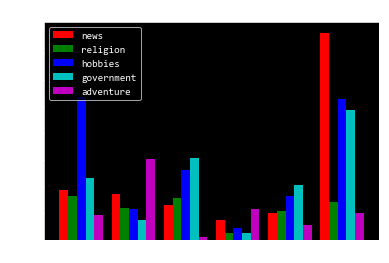

In [2]:
# Ex4-10：布朗语料库中不同部分的情态动词频率
colors = 'rgbcmyk'  # red, green, blue, cyan, magenta, yellow, black


def bar_chart(categories, words, counts):
    """Plot a bar chart showing counts for each word by category"""
    import pylab
    ind = pylab.arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = plt.bar(ind + c * width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    plt.xticks(ind + width, words)
    plt.legend([b[0] for b in bar_groups], categories, loc='upper left')
    plt.ylabel('频率')
    plt.title('Genre 风格的文章中 6 个情态动词的频率')
    plt.show()


genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in genres
        for word in nltk.corpus.brown.words(categories=genre)
        if word in modals
)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

bar_chart(genres, modals, counts)

In [3]:
import sys

sys.setrecursionlimit(100000)  
# 设置递归深度为100000，避免递归深度不够，导致pyplot.savefig()报错

from matplotlib import use, pyplot

use('Agg')
pyplot.savefig('modals.png')  
# RecursionError: maximum recursion depth exceeded，因为递归深度超过1000
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

# 4.8.2 NetworkX(P182)
NetworkX包定义和操作由节点和边组成的结构（称为图）。

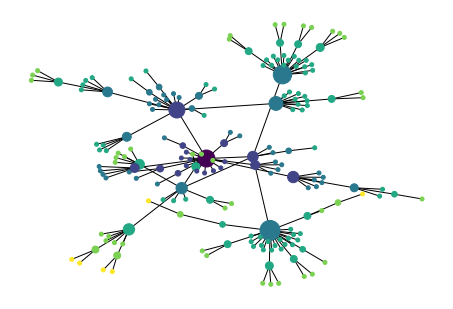

In [4]:
# Ex4-11：使用NetworkX 和 Matplotlib 结合来可视化WordNet的网络结构（语义网络）
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn


def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)


def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G


def graph_draw(graph):
    nx.draw(graph,
            node_size=[16 * graph.degree(n) for n in graph],
            node_color=[graph.depth[n] for n in graph],
            with_labels=False)
    matplotlib.pyplot.show()


dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

### 4.8.3 CSV(Comma-separated values, 逗号分隔型取值格式)

In [5]:
import csv

# 不能使用'b'，即bytes格式读取会报错
input_file = open('PythonNLP/dict.files/lexicon.csv', 'rb')
print("csv.reader(input_file)= ",csv.reader(input_file))
input_file = open('PythonNLP/dict.files/lexicon.csv')
print("list(csv.reader(input_file))= ",list(csv.reader(input_file)))
input_file.seek(0)  # 文件内容读出后，需要重新将指针归零，才能再次读出数据
for row in csv.reader(input_file):
    print(row)

csv.reader(input_file)=  <_csv.reader object at 0x00000000120B06C8>
list(csv.reader(input_file))=  [['sleep', ' sli:p', ' v.i', ' a condition of body and mind...'], ['walk', ' wo:k', ' v.intr', ' progress by lifting and setting down each foot...'], ['wake', ' weik', ' intrans', ' cease to sleep']]
['sleep', ' sli:p', ' v.i', ' a condition of body and mind...']
['walk', ' wo:k', ' v.intr', ' progress by lifting and setting down each foot...']
['wake', ' weik', ' intrans', ' cease to sleep']


### 4.8.4 NumPy

In [6]:
from numpy import array

cube = array([[[0, 0, 0], [1, 1, 1], [2, 2, 2]],
              [[3, 3, 3], [4, 4, 4], [5, 5, 5]],
              [[6, 6, 6], [7, 7, 7], [8, 8, 8]]])
print("cube[1, 1, 1]= ", cube[1, 1, 1])
show_subtitle("cube[2, 1:]")
print(cube[2, 1:])
show_subtitle("cube[2].transpose()")
print(cube[2].transpose())

cube[1, 1, 1]=  4
--------------- >cube[2, 1:]< ---------------
[[7 7 7]
 [8 8 8]]
--------------- >cube[2].transpose()< ---------------
[[6 7 8]
 [6 7 8]
 [6 7 8]]


In [7]:
# Numpy 提供了线性代数函数。
# 可以进行矩阵的奇异值分解，应用在潜在语义分析中，帮助识别文档集合中的隐含概念。
from numpy import linalg

a = array([[4, 0], [3, -5]])
u, s, vt = linalg.svd(a)
show_subtitle("u")
print(u)
show_subtitle("s")
print(s)
show_subtitle("vt")
print(vt)

--------------- >u< ---------------
[[-0.447 -0.894]
 [-0.894  0.447]]
--------------- >s< ---------------
[6.325 3.162]
--------------- >vt< ---------------
[[-0.707  0.707]
 [-0.707 -0.707]]


### 4.8.5 其他 Python 库

-   关系数据库：mysql-python
-   大数据集合：PyLucene
-   PDF: pypdf
-   MSWord: pywin32
-   XML: xml.etree
-   RSS: feedparser
-   e-mail: imaplib, email

## 4.9 小结

-   使用对象引用进行 Python 赋值和参数传递。
-   使用 is 测试对象是否相同，使用 == 测试对象是否相等
-   字符串、链表 和 元组 是不同类型的序列对象，支持常用的序列操作(索引、切片、len()、sorted()、使用 in 的成员测试)
-   通过打开文件将文本写入到文件中
-   声明式的编程风格使用代码更加简洁可读
-   函数是编程的抽象化过程，关键概念(参数传递、变量范围 和 docstrings)
-   函数作为命名空间，在函数内部定义的变量名称在函数外部是不可见的，除非宣布为全局变量
-   模块允许将材料与本地的文件逻辑关联起来。模块作为命名空间，在模块内部定义的变量和函数在模块外部是不可见的，除非这些名称被其他模块导入
-   动态规划是一种在NLP中广泛使用的算法设计技术，通过存储以前的计算结果，避免重复计算